# WeatherPy

In [1]:
# Dependencies and setup.

%matplotlib inline

import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy to get cities based on latitude and longitude
from citipy import citipy

# Output file (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Weather API key.
weather_api_key

'a6a71f9604b1a38f6deb7dbe79c0c329'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat-lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to cities list only if city is unique.
    if city not in cities:
         cities.append(city)

# Print the city count to check for sufficient count.
len(cities)

631

## Perform API Calls

In [4]:
# Starting empty lists to store all data after retrieval.

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
latitude = []
longitude = []
wind = []

In [5]:
# Starting URL for Open Open Weather Map API Call.

record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Print the data header.
print("BEGINNING DATA RETRIEVAL")
print("-----------------------------------------")

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])          
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

# Print the data footer to indicate completion of data retrieval.
print("-------------------------")
print("DATA RETRIEVAL COMPLETE")

BEGINNING DATA RETRIEVAL
-----------------------------------------
Processing record 1 of set 0 | port alfred
Processing record 2 of set 0 | vao
Processing record 3 of set 0 | vaitupu
City not found!
Processing record 4 of set 0 | vestmannaeyjar
Processing record 5 of set 0 | ushuaia
Processing record 6 of set 0 | kaitangata
Processing record 7 of set 0 | samusu
City not found!
Processing record 8 of set 0 | illoqqortoormiut
City not found!
Processing record 9 of set 0 | jamestown
Processing record 10 of set 0 | taolanaro
City not found!
Processing record 11 of set 0 | margate
Processing record 12 of set 0 | blythe
Processing record 13 of set 0 | atambua
Processing record 14 of set 0 | mataura
Processing record 15 of set 0 | porto belo
Processing record 16 of set 0 | bredasdorp
Processing record 17 of set 0 | lavrentiya
Processing record 18 of set 0 | hobart
Processing record 19 of set 0 | kapaa
Processing record 20 of set 0 | lahat
Processing record 21 of set 0 | rikitea
Processing re

### Convert Raw Data to DataFrame

In [6]:
# Create a dataframe from array of JSONs.
weather_dict = {
    "City": new_cities,
    "Latitude" : latitude,
    "Longitude" : longitude, 
    "Country" : country,
    "Wind Speed" : wind,   
    "Max Temp": temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Date" : date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          576
Latitude      576
Longitude     576
Country       576
Wind Speed    576
Max Temp      576
Humidity      576
Cloudiness    576
Date          576
dtype: int64

In [7]:
# Display the dataframe.        
weather_data.head()

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,port alfred,-33.59,26.89,ZA,24.14,60.75,44,100,1601107867
1,vao,-22.67,167.48,NC,18.34,72.75,91,20,1601107569
2,vestmannaeyjar,63.44,-20.27,IS,28.52,49.78,91,100,1601107868
3,ushuaia,-54.80,-68.30,AR,14.99,39.20,86,75,1601107868
4,kaitangata,-46.28,169.85,NZ,3.00,55.00,58,23,1601107868


In [8]:
cities_list = zip(new_cities, latitude, longitude, country, temp, humidity, cloudiness, wind, date)

# Set variable for output file.
output_file = os.path.join("output_data", "cities.csv")

#  Open the output file.
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

## Inspect the data and remove the cities where the humidity > 100%.

In [9]:
#  Get indices of cities with humidity over 100%.
all_weather_data = weather_data[(weather_data["Humidity"] > 100)].index

# Make new dataframe after dropping all humidity > 100% by index.
weather_data_final = weather_data.drop(all_weather_data, inplace=False)
weather_data_final

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,port alfred,-33.59,26.89,ZA,24.14,60.75,44,100,1601107867
1,vao,-22.67,167.48,NC,18.34,72.75,91,20,1601107569
2,vestmannaeyjar,63.44,-20.27,IS,28.52,49.78,91,100,1601107868
3,ushuaia,-54.80,-68.30,AR,14.99,39.20,86,75,1601107868
4,kaitangata,-46.28,169.85,NZ,3.00,55.00,58,23,1601107868
...,...,...,...,...,...,...,...,...,...
571,rafai,4.95,23.92,CF,4.21,81.27,65,97,1601108005
572,antalaha,-14.90,50.28,MG,9.19,77.95,57,6,1601108006
573,sakakah,29.97,40.21,SA,12.75,86.00,27,0,1601108006
574,wahpeton,46.27,-96.61,US,4.74,59.00,58,1,1601108006


In [10]:
# Extract fields from dataframe.
lats = weather_data_final["Latitude"]
max_temps = weather_data_final["Max Temp"]
humidity = weather_data_final["Humidity"]
cloudiness = weather_data_final["Cloudiness"]
wind_speed = weather_data_final["Wind Speed"]

# Export data to a csv file.
weather_data_final.to_csv(output_data_file, index_label="City_ID")

## **Plotting the Data**

## Latitude vs. Temperature Plot

In [11]:
# Format date stamp

date = datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

print(date)

09/26/2020


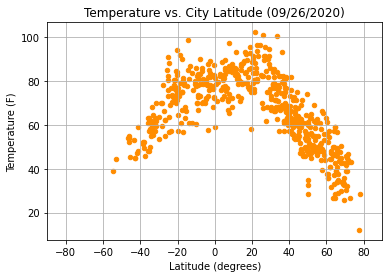

In [12]:
weather_data_final.plot(kind="scatter", x="Latitude", y="Max Temp", c="DarkOrange")
plt.title("Temperature vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("output_data/Temperature_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
#####  Analysis: The plot demonstrates that temperatures are higher at lower latitudes, as we get closer to the Equator. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Humidity Plot

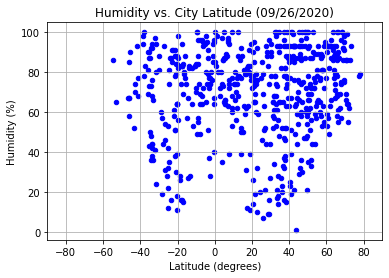

In [13]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Humidity", c="Blue")
plt.title("Humidity vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Humidity_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot demonstrates that high humidites are found at all latitudes, but lower and medium humidity levels seem to be concentrated within the 10-40 degree latitude range to both the north and south of the Equator. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

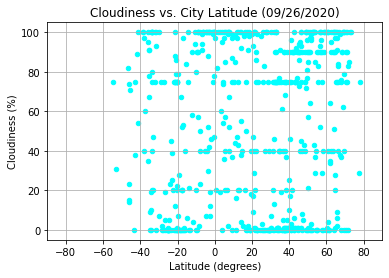

In [14]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Cloudiness", c="Cyan")
plt.title("Cloudiness vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot shows no specific relationship between cloudiness and latitude since all levels of cloudiness occur at all latitudes. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Wind Speed Plot

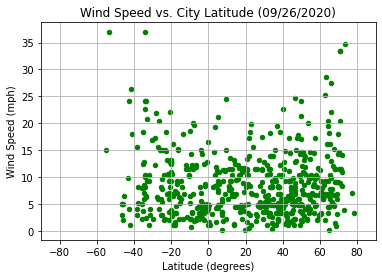

In [15]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Wind Speed", c="Green")
plt.title("Wind Speed vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/WindSpeed_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot shows no specific relation between wind and latitude since all wind speeds occur at all latitudes. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## **Linear Regression**

In [16]:
# Create Northern and Southern Hemisphere dataframes.

N_hemi_df = weather_data_final.loc[weather_data_final["Latitude"]>0]
S_hemi_df = weather_data_final.loc[weather_data_final["Latitude"]<0]

In [17]:
N_hemi_df

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
2,vestmannaeyjar,63.44,-20.27,IS,28.52,49.78,91,100,1601107868
5,jamestown,42.10,-79.24,US,5.82,55.99,93,1,1601107869
6,margate,51.38,1.39,GB,14.00,48.00,74,97,1601107869
7,blythe,33.61,-114.60,US,4.70,84.20,17,1,1601107869
12,lavrentiya,65.58,-171.00,RU,7.72,33.91,89,2,1601107871
...,...,...,...,...,...,...,...,...,...
570,roald,62.58,6.13,NO,25.28,48.20,66,40,1601108005
571,rafai,4.95,23.92,CF,4.21,81.27,65,97,1601108005
573,sakakah,29.97,40.21,SA,12.75,86.00,27,0,1601108006
574,wahpeton,46.27,-96.61,US,4.74,59.00,58,1,1601108006


In [18]:
S_hemi_df

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,port alfred,-33.59,26.89,ZA,24.14,60.75,44,100,1601107867
1,vao,-22.67,167.48,NC,18.34,72.75,91,20,1601107569
3,ushuaia,-54.80,-68.30,AR,14.99,39.20,86,75,1601107868
4,kaitangata,-46.28,169.85,NZ,3.00,55.00,58,23,1601107868
8,atambua,-9.11,124.89,ID,0.76,83.37,55,100,1601107870
...,...,...,...,...,...,...,...,...,...
563,burnie,-41.07,145.92,AU,18.01,48.00,68,54,1601108003
565,linares,-35.85,-71.60,CL,2.17,48.18,81,95,1601108003
567,manjacaze,-24.71,33.88,MZ,7.85,88.34,35,0,1601108004
569,vanimo,-2.67,141.30,PG,4.90,81.99,74,12,1601108004


##### **Temperature (F) vs. Latitude in Northern Hemisphere - Linear Regression**

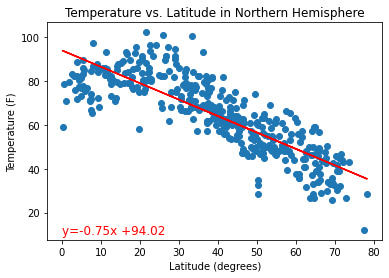

In [19]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,10), fontsize=12, color="red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a strong negative correlation between temperature and latitude in the Northern Hemisphere.

##### **Temperature (F) vs. Latitude in Southern Hemisphere - Linear Regression**

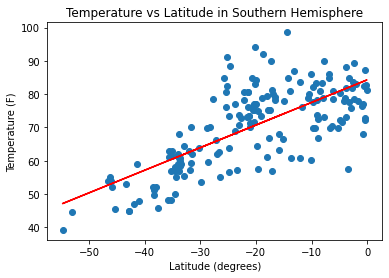

In [20]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize=12, color="red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a strong positive correlation between temperature and latitude in the Southern Hemisphere.

#### **Humidity (%) vs. Latitude in Northern Hemisphere - Linear Regression**

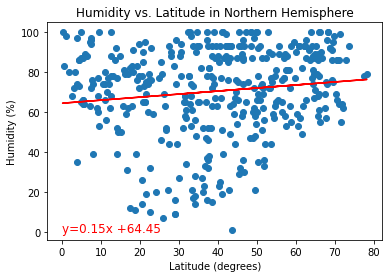

In [21]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between humidity and latitude in the Northern Hemisphere.

#### **Humidity (%) vs. Latitude in Southern Hemisphere - Linear Regression**

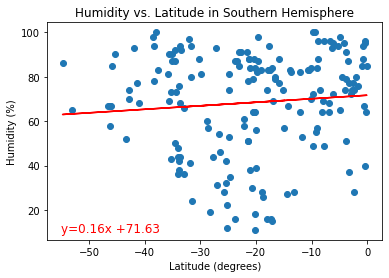

In [22]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,10), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between humidity and latitude in the Southern Hemisphere.

#### **Cloudiness (%) vs. Latitude in Northern Hemisphere - Linear Regression**

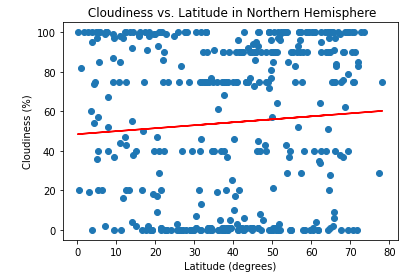

In [23]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-18,62), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title(" Cloudiness vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates no correlation between cloudiness and latitude in the Northern Hemisphere.

#### **Cloudiness (%) vs. Latitude in Southern Hemisphere - Linear Regression**

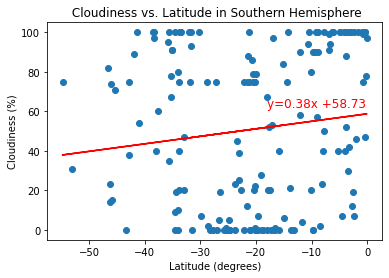

In [24]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-18,62), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title(" Cloudiness vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between cloudiness and latitude in the Southern Hemisphere.

#### **Wind Speed (mph) vs. Latitude in Northern Hemisphere - Linear Regression**

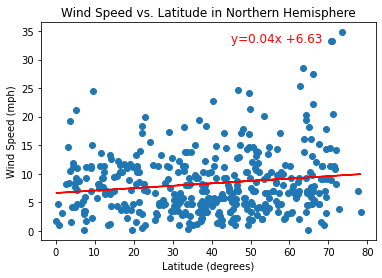

In [25]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,33), fontsize = 12, color = "red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between wind speed and latitude in the Northern Hemisphere.

#### **Wind Speed (mph) vs. Latitude in Southern Hemisphere - Linear Regression**

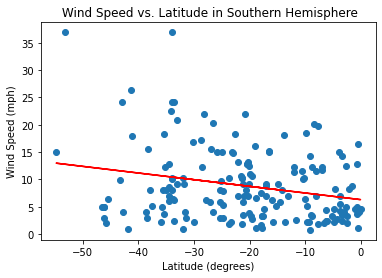

In [26]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,39), fontsize = 12, color = "red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title(" Wind Speed vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly negative or nearly no correlation between wind speed and latitude in the Southern Hemisphere.